In [1]:
import pandas as pd
import yfinance as yf
import matplotlib
import numpy as np

In [2]:
date_start = "2018-01-01"
date_end = "2023-12-31"
market = yf.Ticker("^GSPC").history(start=date_start, end=date_end, interval="1d")
stock = yf.Ticker("EXPD").history(start=date_start, end=date_end, interval="1d")


In [3]:
data = pd.DataFrame()
data['market'] = market['Close']
data['stock'] = stock['Close']
data.reset_index(inplace=True)
data = data.drop(columns=['Date'])
data

,market,stock
0,2695.810059,60.131817
1,2713.060059,60.215092
2,2723.989990,60.150318
3,2743.149902,60.233601
4,2747.709961,60.594517
...,...,...
1504,4754.629883,128.131638
1505,4774.750000,127.535255
1506,4781.580078,127.107849
1507,4783.350098,126.809662


<Axes: >

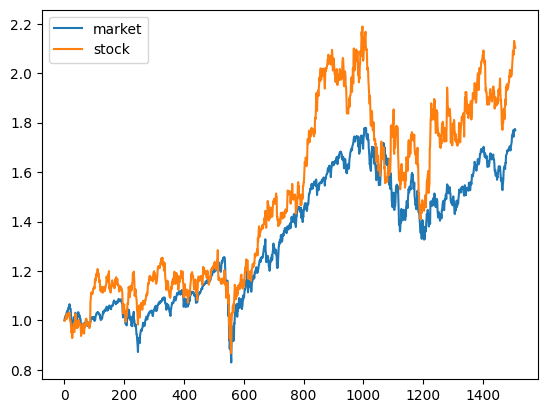

In [4]:
def normalize(df):
  x = df.copy()
  for i in x.columns[0:]:
    x[i] = x[i]/x[i][0]
  return x

data = normalize(data)
data.plot()

In [5]:
def daily_return(df):
    df_daily_return = df.copy()
    for i in df.columns[0:]:
        for j in range(1, len(df)):
            df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
        df_daily_return[i][0] = 0
    return df_daily_return

data_daily_return = daily_return(data)
data_daily_return

/var/folders/rx/tstwq_0j2fs2k5dh4m8xnhdc0000gn/T/ipykernel_1140/2284912146.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
/var/folders/rx/tstwq_0j2fs2k5dh4m8xnhdc0000gn/T

,market,stock
0,0.000000,0.000000
1,0.639882,0.138487
2,0.402864,-0.107570
3,0.703377,0.138457
4,0.166234,0.599194
...,...,...
1504,0.166006,1.768378
1505,0.423169,-0.465445
1506,0.143046,-0.335128
1507,0.037017,-0.234594


In [6]:
beta, alpha = np.polyfit(data_daily_return['market'], data_daily_return['stock'], 1)

In [7]:
data_daily_return['market'].mean()
rm = data_daily_return['market'].mean() * 252
rf = 0 
ER_AAPL = rf + (beta * (rm-rf)) 
ER_AAPL

np.float64(9.646356539475015)